In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [74]:
# cào dl từ minhtuanmobile
url="https://minhtuanmobile.com/"
page=requests.get(url)

soup= BeautifulSoup(page.text, "html.parser")

In [60]:
phones1 = soup.find_all("h3", class_="probox__title")
prices1 = soup.find_all("b", class_="price")
mtmobile_lst=[]
for phone,price in zip(phones1,prices1) :
    mtmobile_lst.append({
        "Product": phone.get_text(strip=True),
        "Price": price.text,
        "Date": datetime.now().strftime("%Y-%m-%d")
})


In [69]:
#lưu vào file csv
df=pd.DataFrame(mtmobile_lst)
df.to_csv("D:/New folder/Semester 3/ADY301m/file csv/phone_prices_weekly.csv", mode="a", index= False, header=False) 

In [5]:
#xử lí dữ liệu 
data=pd.read_csv("D:/New folder/Semester 3/ADY301m/file csv/phone_prices_weekly.csv",names=["Product","Price","Date"])

data["Price"]=data["Price"].str.replace("đ","", regex=False)
data["Price"]=data["Price"].str.replace(",","", regex=False)
data["Price"]=data["Price"].str.replace(".","", regex=False)

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

data.to_csv('phone_prices_weekly.csv', index=False)
data.head()


,Product,Price,Date
0,iPhone 16 Pro Max 256GB - Chính hãng VN/A,34990000,10/1/2024
1,iPhone 16 Pro Max 512GB - Chính hãng VN/A,40490000,10/1/2024
2,iPhone 16 Pro 128GB - Chính hãng VN/A,28490000,10/1/2024
3,iPhone 16 Pro 256GB - Chính hãng VN/A,31490000,10/1/2024
4,iPhone 16 Plus 128GB - Chính hãng VN/A,25490000,10/1/2024


In [6]:
#tạo phân khúc sản phẩm
data["Segment"]=pd.cut(data["Price"], bins=[0,7000000, 20000000,42000000], labels=["Low", "Mid","High"])

#chuyển đôĩ cột date thành datetime
data["Date"]=pd.to_datetime(data["Date"])

#tính giá trị trb theo tuần
data["Week"]= data["Date"].dt.to_period("W")
weekly_avg= data.groupby("Week")["Price"].mean()

# Tính gía trị trb theo tháng
data["Month"]= data["Date"].dt.to_period("M")
monthly_avg= data.groupby("Month")["Price"].mean()

#tính gttb theo segment
segment_avg= data.groupby(["Segment"])["Price"].mean();

data.head()



C:\Users\HOAIPHUC\AppData\Local\Temp\ipykernel_9168\296716107.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_avg= data.groupby(["Segment"])["Price"].mean();


,Product,Price,Date,Segment,Week,Month
0,iPhone 16 Pro Max 256GB - Chính hãng VN/A,34990000,2024-10-01,High,2024-09-30/2024-10-06,2024-10
1,iPhone 16 Pro Max 512GB - Chính hãng VN/A,40490000,2024-10-01,High,2024-09-30/2024-10-06,2024-10
2,iPhone 16 Pro 128GB - Chính hãng VN/A,28490000,2024-10-01,High,2024-09-30/2024-10-06,2024-10
3,iPhone 16 Pro 256GB - Chính hãng VN/A,31490000,2024-10-01,High,2024-09-30/2024-10-06,2024-10
4,iPhone 16 Plus 128GB - Chính hãng VN/A,25490000,2024-10-01,High,2024-09-30/2024-10-06,2024-10


In [7]:
#In ra gttb theo tuần . tháng , năm
print(f"Gía trị trung theo tuần :{weekly_avg}","\n")

print(f"Gía trị trung theo tháng :{monthly_avg}","\n")

print(f"Gía trị trung theo segment:{segment_avg}")

Gía trị trung theo tuần :Week
2024-09-30/2024-10-06    1.189342e+07
Freq: W-SUN, Name: Price, dtype: float64 

Gía trị trung theo tháng :Month
2024-10    1.189342e+07
Freq: M, Name: Price, dtype: float64 

Gía trị trung theo segment:Segment
Low     1.548326e+06
Mid     1.393533e+07
High    2.904000e+07
Name: Price, dtype: float64


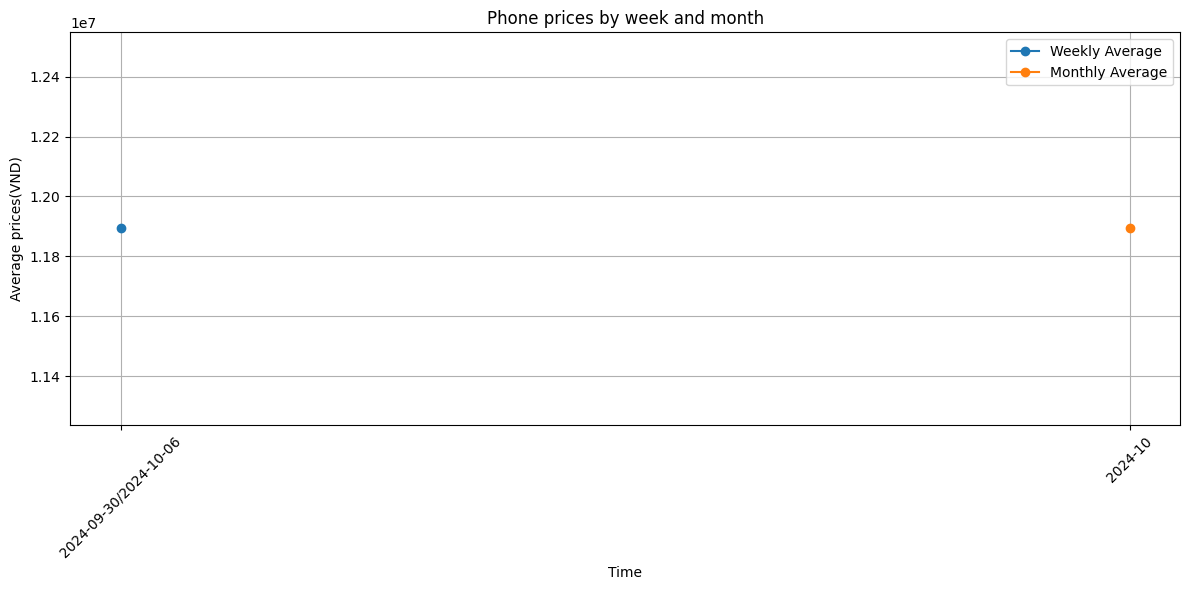

In [8]:
#Visualation
plt.figure(figsize=(12,6))

plt.plot(weekly_avg.index.astype(str), weekly_avg.values, label='Weekly Average', marker='o')
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, label='Monthly Average', marker='o')

plt.title("Phone prices by week and month") 
plt.xlabel("Time") 
plt.ylabel("Average prices(VND)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





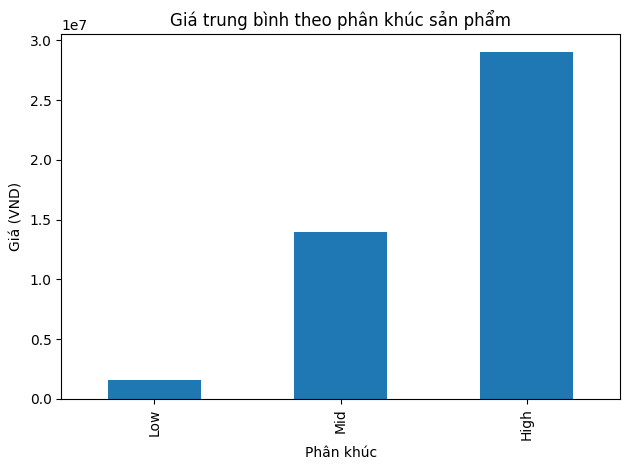

In [9]:
# Vẽ biểu đồ phân khúc sản phẩm
segment_avg.plot(kind='bar', title='Giá trung bình theo phân khúc sản phẩm', ylabel='Giá (VND)', xlabel='Phân khúc')
plt.tight_layout()
plt.show()

In [10]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Chuyển đổi cột Date thành số tuần (numeric)
data['Date_Numeric'] = data['Date'].dt.strftime('%Y%U').astype(int)

# Chọn các biến cho mô hình hồi quy
X = data[['Date_Numeric']]
y = data['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Mô hình hồi quy
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán giá điện thoại trong tương lai
future_weeks = pd.DataFrame({'Date_Numeric': range(data['Date_Numeric'].max(), data['Date_Numeric'].max() + 10)})
predictions = model.predict(future_weeks)
predictions

array([11838064.62585034, 11838064.62585034, 11838064.62585034,
       11838064.62585034, 11838064.62585034, 11838064.62585034,
       11838064.62585034, 11838064.62585034, 11838064.62585034,
       11838064.62585034])